In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import scipy as sp
import scipy.interpolate
import os
import sys
from mpl_styles import analytic
sys.path.insert(0, '/home/astrosun/jtlaune/athena/vis/python')
import athena_read
import yt
%matplotlib inline

yt : [WARNING  ] 2023-05-02 12:52:09,218 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-02 12:52:09,219 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-02 12:52:09,219 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-02 12:52:09,220 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-02 12:52:09,250 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-05-02 12:52:09,250 Parameters: domain_dimensions         = [ 256 1536    1]
yt : [INFO     ] 2023-05-02 12:52:09,251 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-02 12:52:09,251 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-02 12:52:09,252 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2023-05-02 12:52:18,478 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-02 12:52:18,480 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-02 12:52:18,480 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-02 12:52:18,481 Assuming 1.0 = 1.0 K
y

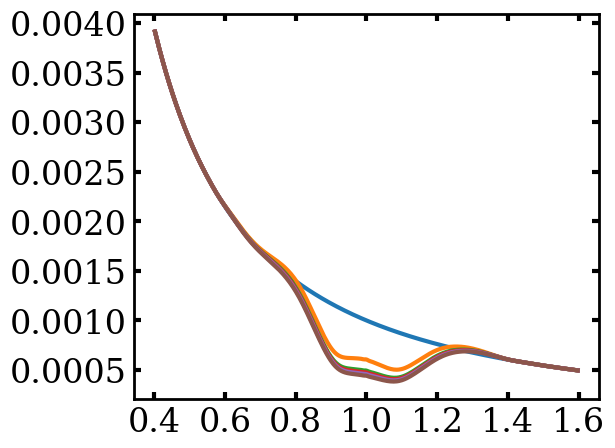

In [4]:
with mpl.rc_context(analytic):
    fig, ax = plt.subplots()
    for iout in [0,100, 150, 160, 170, 180]:
        ds = yt.load(f"/home/astrosun/jtlaune/PrelimProductRun/JTrunII_Acc/ppd_cyl.out1.{iout:05}.athdf")
        dd = ds.all_data()
        dd["athena_pp","dens"].shape
        rg = np.linspace(0.4,1.6,1000)
        pg = np.linspace(-np.pi,np.pi,6000)
        rr, pp = np.meshgrid(rg,pg)
        densg = sp.interpolate.griddata(dd.fcoords[:,:2],dd["athena_pp","dens"],(rr,pp),method="linear")
        densg = np.nan_to_num(densg,0)
        ax.plot(rg[2:-2],np.mean(densg,axis=0)[2:-2],label=f"T={iout} orbits")

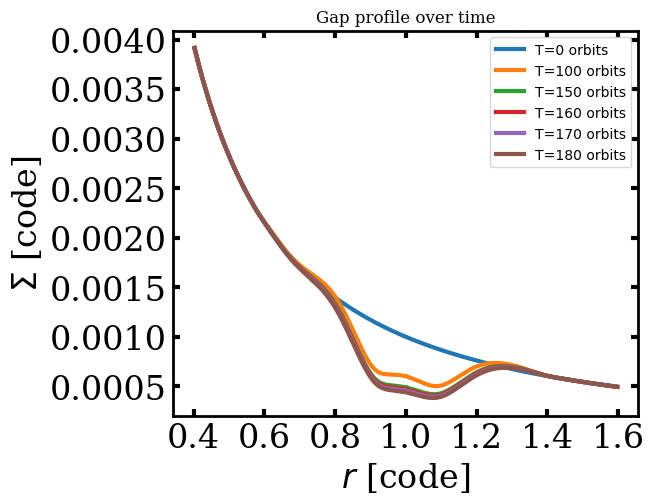

In [8]:
ax.legend()
ax.set_ylabel(r"$\Sigma$ [code]")
ax.set_xlabel(r"$r$ [code]")
ax.set_title("Gap profile over time")
fig